In [56]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm

# set env
np.set_printoptions(suppress=True)
pd.set_option('display.max_columns', 100)
import sys
np.set_printoptions(threshold=sys.maxsize)

cls_df = pd.read_csv('../data/_datasets/cluster_res/out_v01/cluster.csv', sep='\t')

max_same_n = cls_df['size_except_complex'].values.max()
for i in range(max_same_n+1):
    mask = cls_df['size_except_complex'] == i
    tmp = cls_df[mask]
    uniq_sz = np.sum(cls_df[mask]['size_unique_complex'].values)
    excp_sz = np.sum(cls_df[mask]['size_except_complex'].values)
    if len(tmp) > 0:
        print("{} {} {} {}".format(i, len(tmp), uniq_sz,excp_sz))

0 1737 3088 0
1 1416 1850 1416
2 240 561 480
3 297 496 891
4 105 345 420
5 101 293 505
6 37 124 222
7 55 207 385
8 41 305 328
9 31 159 279
10 25 167 250
11 13 68 143
12 15 124 180
13 14 79 182
14 10 99 140
15 10 96 150
16 11 111 176
17 6 59 102
18 4 11 72
19 3 16 57
20 7 70 140
21 4 35 84
22 1 22 22
23 2 14 46
24 2 19 48
25 1 24 25
26 6 57 156
27 6 88 162
28 5 89 140
29 1 1 29
30 3 39 90
31 2 40 62
32 1 2 32
33 2 15 66
34 1 17 34
35 2 13 70
36 1 16 36
37 1 40 37
39 1 7 39
41 1 3 41
48 1 18 48
49 2 93 98
52 1 13 52
64 1 32 64
138 1 37 138


In [51]:
mask = cls_df['size_except_complex'] == 0
avg_ds = cls_df[mask]['avg_distance'].values
print(avg_ds.min(), avg_ds.max(), avg_ds.mean())
len( np.where(avg_ds < 3.8)[0] ), len(avg_ds)

2.685605261111081 5.274135473727999 3.6521699565881116


(1256, 1737)

array([[<Axes: title={'center': 'avg_distance'}>]], dtype=object)

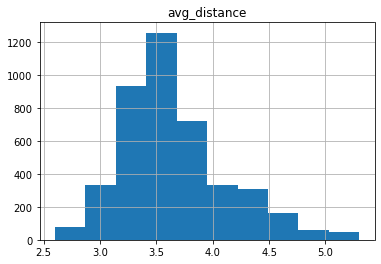

In [52]:


cls_df.hist(column='avg_distance')

array([[<Axes: title={'center': 'avg_distance'}>]], dtype=object)

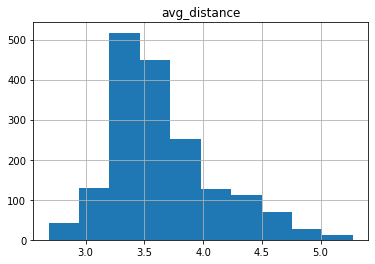

In [53]:
mask = cls_df['size_except_complex'] == 0

cls_df[mask].hist(column='avg_distance')

In [54]:
import numpy as np

data =[1, 2, 3, 4,5,6,7, 8, 9,10,1000]

mean = np.mean(data)
std = np.std(data)

threshold = 3
outliers = []
for x in data:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  95.9090909090909

Standard deviation:  285.9117646933799

Outliers  :  [1000]
